## Imports and Data

In [1]:
import pandas as pd

In [3]:
df = pd.read_parquet("data/refused_model_df.parquet", engine="pyarrow").drop(
    columns=["CODE_REJECT_REASON"]
)

## Pycaret

In [4]:
from pycaret.classification import setup, compare_models, evaluate_model, plot_model

Sample to run faster.

In [5]:
df_sample = df.sample(frac=0.2, random_state=42)

Reduce validation fold count from 10 to 3 to run faster.

In [6]:
s = setup(df_sample, target="NAME_CONTRACT_STATUS_Refused", fold=3, session_id=42)

,Description,Value
0,Session id,42
1,Target,NAME_CONTRACT_STATUS_Refused
2,Target type,Binary
3,Original data shape,"(219426, 27)"
4,Transformed data shape,"(219426, 115)"
5,Transformed train set shape,"(153598, 115)"
6,Transformed test set shape,"(65828, 115)"
7,Ordinal features,1
8,Numeric features,12
9,Categorical features,14


In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8579,0.8555,0.4812,0.7565,0.5882,0.5075,0.5264,8.6367
gbc,Gradient Boosting Classifier,0.8576,0.8611,0.4748,0.7600,0.5844,0.5040,0.5243,28.5133
et,Extra Trees Classifier,0.8519,0.8374,0.4723,0.7302,0.5736,0.4889,0.5059,11.0733
ada,Ada Boost Classifier,0.8482,0.8389,0.4114,0.7588,0.5335,0.4522,0.4825,8.4367
lda,Linear Discriminant Analysis,0.8445,0.8265,0.4295,0.7209,0.5382,0.4518,0.4738,4.2433
ridge,Ridge Classifier,0.8425,0.0000,0.3411,0.7957,0.4775,0.4017,0.4519,2.0667
qda,Quadratic Discriminant Analysis,0.8174,0.6613,0.1864,0.8251,0.2865,0.2317,0.3139,3.4167
lr,Logistic Regression,0.8129,0.6623,0.1885,0.7142,0.2982,0.2304,0.2994,5.1700
knn,K Neighbors Classifier,0.8006,0.7138,0.3163,0.5474,0.4009,0.2914,0.3072,52.2467
dt,Decision Tree Classifier,0.7956,0.7022,0.5405,0.5149,0.5274,0.3971,0.3973,5.1700


Tree based models seem to have performed the best, which is no surprise. 

In [8]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

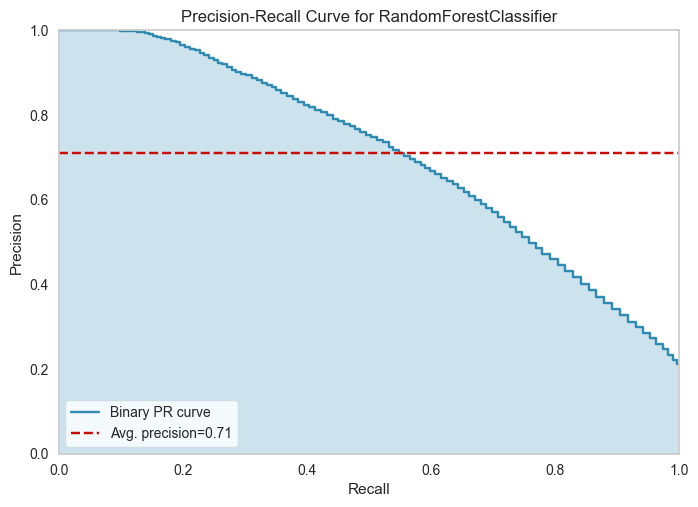

In [11]:
plot_model(best, plot="pr")

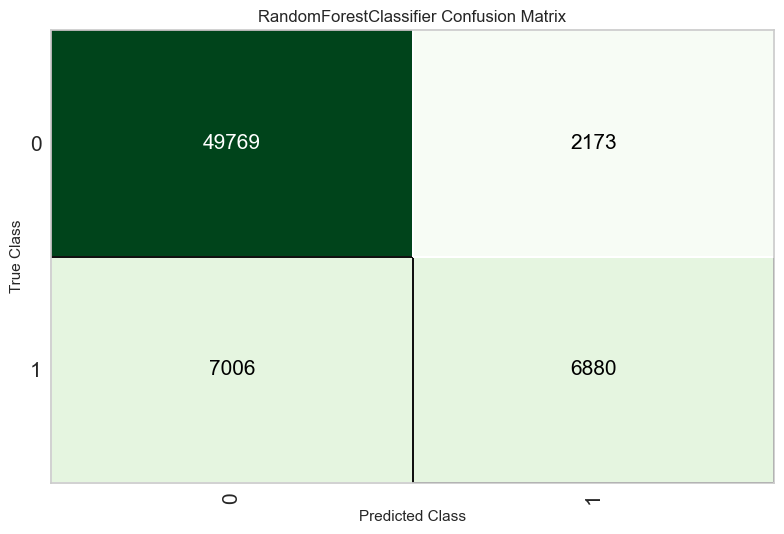

In [10]:
plot_model(best, plot="confusion_matrix")

The PRC and confusion matrix seem quite good for a baseline model, especially since we know how it went when we tried predicting TARGET. Either our new problem is easier to solve or we are somehow leaking information about the target.